## Stock Market Analysis 

### We analyze date of three leading tech companies Apple, Google, and Amazon using DJIA 30 Stock Time Series Data set from Kaggle. First, we intialize the python module/library required for analysis given they are locally installed in our computer or in the Kaggle Cloud OS. 

Please free to fork the kernel, edit, and add to it. Would appreciate if you leave comments and upvote

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web

### Part 1: Importing Data

In [2]:
#start = datetime.datetime(2015, 1, 1)
#end = datetime.datetime(2020, 1, 1)

In [3]:
#The Yahoo API is restricted for some reason from the Kaggle Cloud platform so we are using the Kaggle Cloud dataset 
#apple = web.DataReader("AAPL", 'yahoo',start, end)
#amazon = web.DataReader("AMZN", 'yahoo', start, end)
#google = web.DataReader("GOOGL", 'yahoo', start, end)

In [4]:
apple = pd.read_csv('../input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google = pd.read_csv('../input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
amazon = pd.read_csv('../input/stock-time-series-20050101-to-20171231/AMZN_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

![](https://media.giphy.com/media/bfrlODgSLqXxS/giphy.gif)

In [5]:
apple.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL
2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL


![](https://media.giphy.com/media/zWyv9xtsEfXQQ/giphy.gif)

In [6]:
amazon.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN
2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN
2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN


![](https://media.giphy.com/media/xTiTnoUnHxVaaVNWhO/giphy.gif)

In [7]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


### Part 2: Open Price Analysis

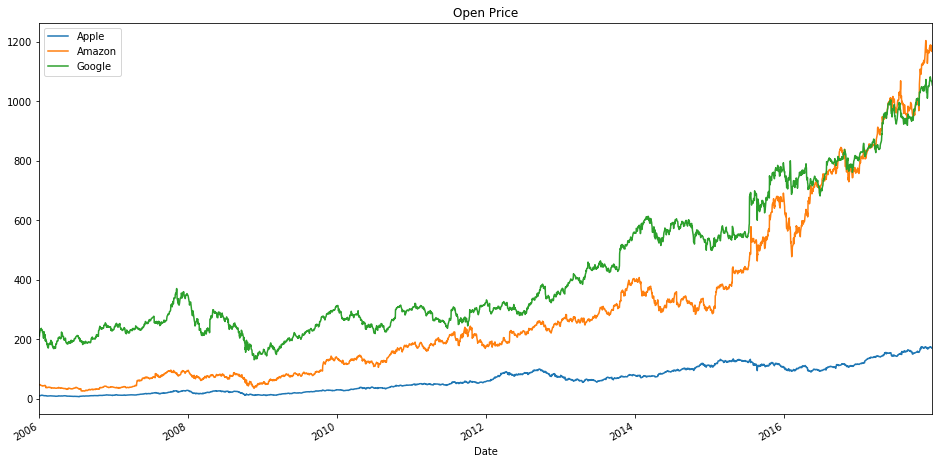

In [8]:
apple['Open'].plot(label='Apple',figsize=(16,8),title='Open Price')
amazon['Open'].plot(label='Amazon')
google['Open'].plot(label='Google')
plt.legend();

** Plot the Volume of stock traded each day.**

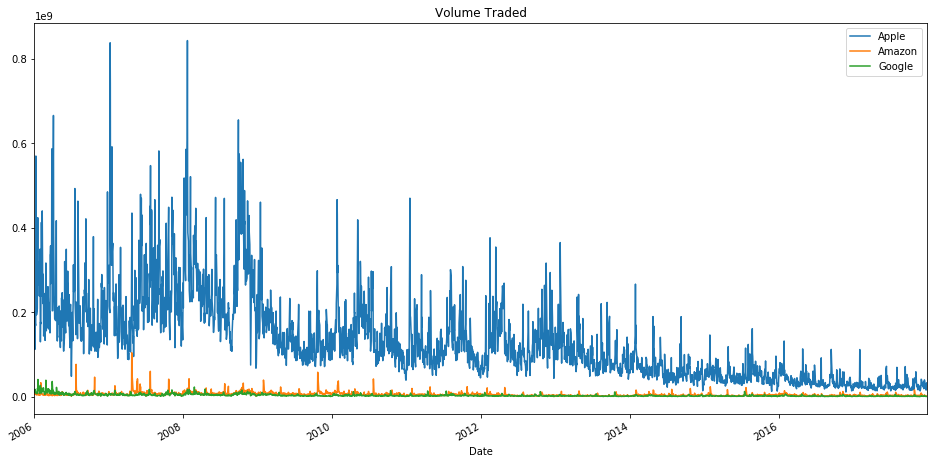

In [9]:
apple['Volume'].plot(label='Apple',figsize=(16,8),title='Volume Traded')
amazon['Volume'].plot(label='Amazon')
google['Volume'].plot(label='Google')
plt.legend();

#### When volume was traded the highest? 

In [10]:
apple['Volume'].max()

843264044

In [11]:
apple['Volume'].argmax()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2008-01-23 00:00:00')

1. #### What happened to apple that day, here's some news!!
#### https://macdailynews.com/2008/01/23/apple_reports_best_quarterly_revenue_and_earnings_in_company_history_street


Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [12]:
apple['Total Traded'] = apple['Open']*apple['Volume']
amazon['Total Traded'] = amazon['Open']*amazon['Volume']
google['Total Traded'] = google['Open']*google['Volume']

** Plot this "Total Traded" against the time index.**

Text(0, 0.5, 'Total Traded')

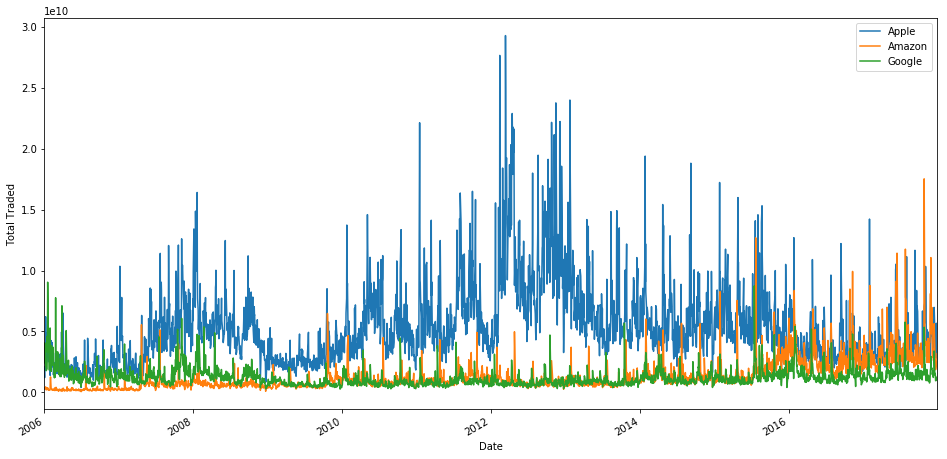

In [13]:
apple['Total Traded'].plot(label='Apple',figsize=(16,8))
amazon['Total Traded'].plot(label='Amazon')
google['Total Traded'].plot(label='Google')
plt.legend()
plt.ylabel('Total Traded')

#### Lets check when was total trade highest for Apple?

In [14]:
amazon['Total Traded'].argmax()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2017-10-27 00:00:00')

![](https://media.giphy.com/media/26n79t82lmj989iAE/giphy.gif)

#### What happened to Apple that day?

#### https://ww.9to5mac.com/2017/10/27/apple-says-demand-for-iphone-x-is-off-the-charts-as-device-sells-out-around-the-world/#aprd

### Part 3: Calculate Moving Average by 50 and 200 days for Amazon

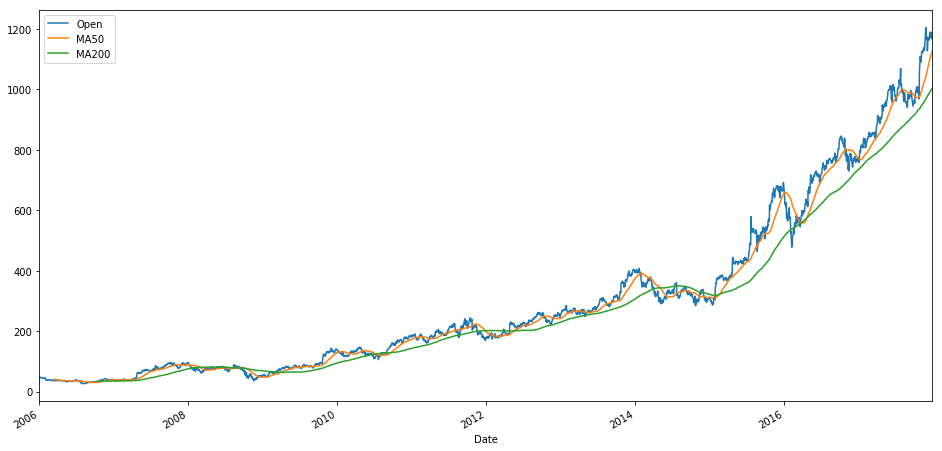

In [15]:
amazon['MA50'] = amazon['Open'].rolling(50).mean()
amazon['MA200'] = amazon['Open'].rolling(200).mean()
amazon[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8));

### Part 4: Using the Scatter Plot Matrix, we check if there are any correlation between the stocks open price of Apple, Amazon, and Google
### https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot 

In [16]:
from pandas.plotting import scatter_matrix

In [17]:
tech_comp = pd.concat([apple['Open'],amazon['Open'],google['Open']],axis=1)

In [18]:
tech_comp.columns = ['Apple Open','Amazon Open','Google Open']

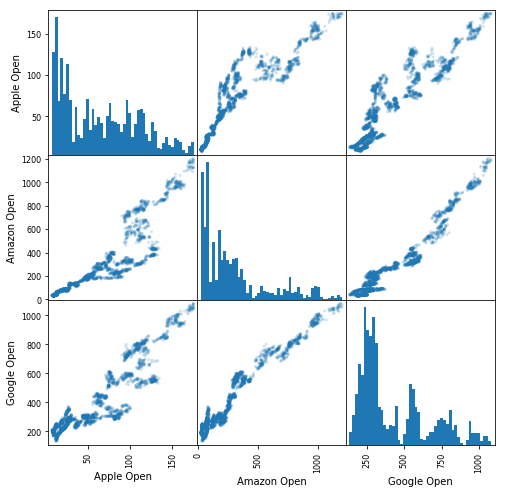

In [19]:
scatter_matrix(tech_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

* Amazon Open Price, Google Open Price, and Apple Open Price all more or less seem to follow y=mx; and it can be seen there's a correlation
* Amazon Open Price and Google Open Price seems more correlated

### Part 5: Basic Financial Analysis

#### Daily Percentage Change

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

First, create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. 

In [20]:
apple['returns'] = (apple['Close'] / apple['Close'].shift(1) ) - 1

In [21]:
apple.head()

,Open,High,Low,Close,Volume,Name,Total Traded,returns
Date,,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL,2.087160e+09,NaN
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL,1.665571e+09,0.002809
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL,1.201514e+09,-0.007470
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL,1.893498e+09,0.025400
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL,1.850719e+09,-0.003670


In [22]:
amazon['returns'] = (amazon['Close'] / amazon['Close'].shift(1) ) - 1

In [23]:
amazon.head()

,Open,High,Low,Close,Volume,Name,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,3.599236e+08,NaN,NaN,NaN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,3.532946e+08,NaN,NaN,-0.006936
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2.554779e+08,NaN,NaN,0.008466
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2.952211e+08,NaN,NaN,0.004617
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,4.163924e+08,NaN,NaN,-0.016503


In [24]:
# Now repeat for the other dataframes
amazon['returns'] = amazon['Close'].pct_change(1)
google['returns'] = google['Close'].pct_change(1)

In [25]:
google.head()

,Open,High,Low,Close,Volume,Name,Total Traded,returns
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,2.778177e+09,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,3.397502e+09,0.023000
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2.414272e+09,0.013507
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,4.060892e+09,0.031924
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,2.987060e+09,0.002660


In [26]:
amazon = amazon.drop(['MA50', 'MA200'], axis=1)
amazon.head()

,Open,High,Low,Close,Volume,Name,Total Traded,returns
Date,,,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,3.599236e+08,NaN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,3.532946e+08,-0.006936
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2.554779e+08,0.008466
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2.952211e+08,0.004617
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,4.163924e+08,-0.016503


** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

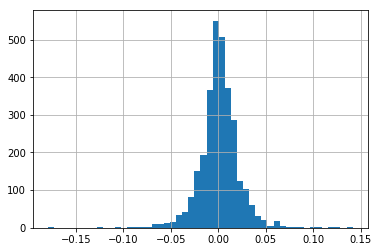

In [27]:
apple['returns'].hist(bins=50);

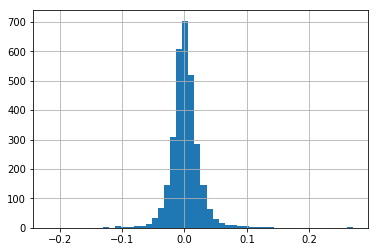

In [28]:
amazon['returns'].hist(bins=50);

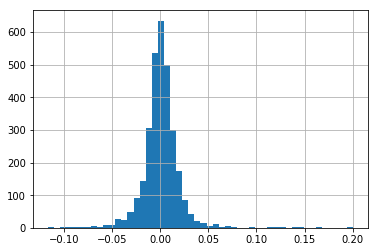

In [29]:
google['returns'].hist(bins=50);

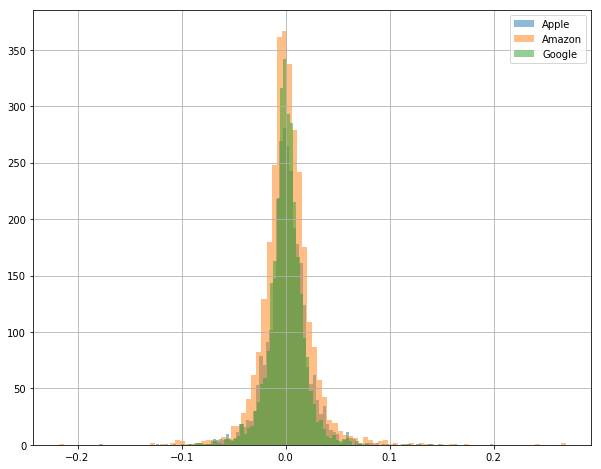

In [30]:
apple['returns'].hist(bins=100,label='Apple',figsize=(10,8),alpha=0.5)
amazon['returns'].hist(bins=100,label='Amazon',alpha=0.5)
google['returns'].hist(bins=100,label='Google',alpha=0.5)
plt.legend();

* When we lay all the histogram plot of percentage return of Apple, Amazon, and Google; we notice the volatility of the percentage return is more or less the same between -0.1 to 0.1+. 

#### Plot a KDE instead of histograms for another view point. Which stock has the widest plot? [](http://)

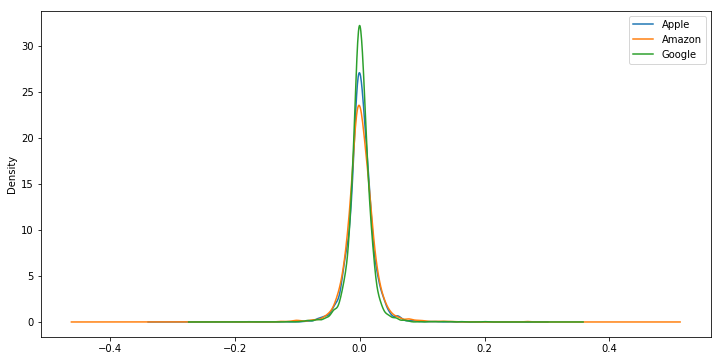

In [31]:
apple['returns'].plot(kind='kde',label='Apple',figsize=(12,6))
amazon['returns'].plot(kind='kde',label='Amazon')
google['returns'].plot(kind='kde',label='Google')
plt.legend();

Now with the KDE diagram we can see that Amazon is more volatile compared to Apple and Google because of the range of percentage change. 

#### Now we draw box plots comparing the returns

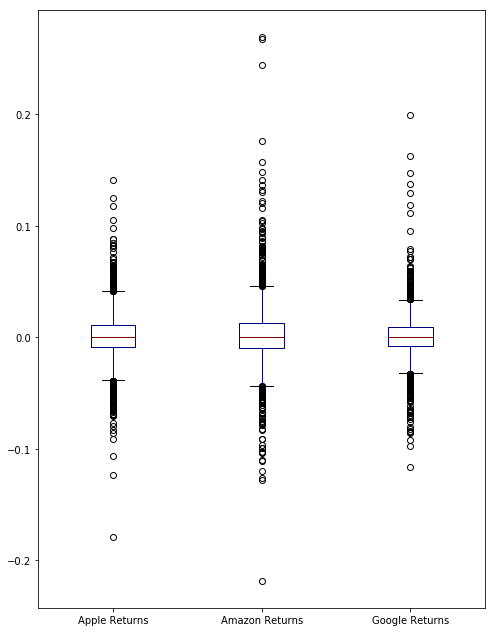

In [32]:
box_df = pd.concat([apple['returns'],amazon['returns'],google['returns']],axis=1)
box_df.columns = ['Apple Returns','Amazon Returns','Google Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet');

The bloxplot now shows how the KDE diagram is so elongated for Amazon

### Part 6: Comparing Daily Returns between Stocks

Now we Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are.

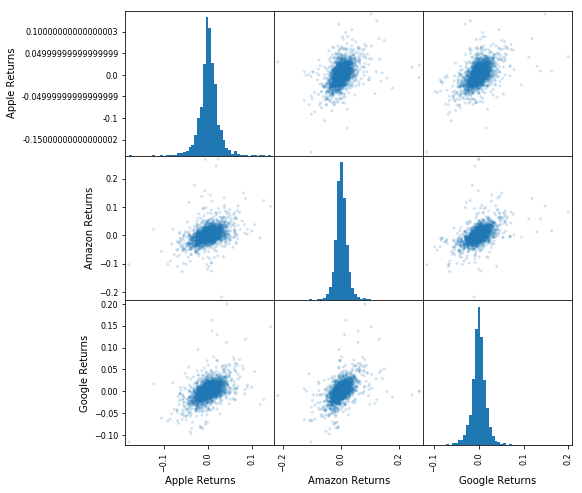

In [33]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

It looks like Amazon, Apple and Google do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!

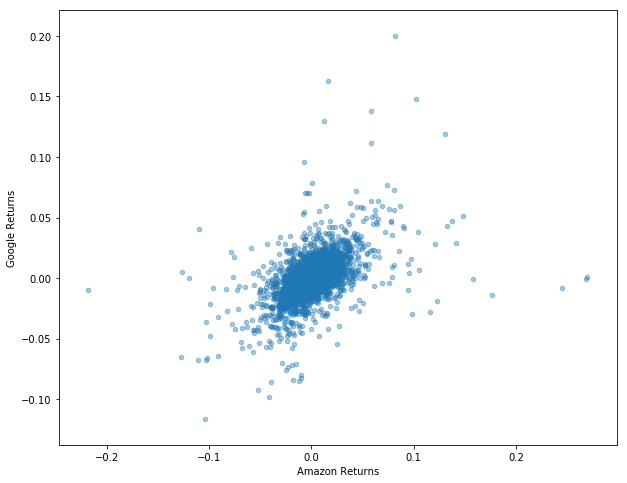

In [34]:
box_df.plot(kind='scatter',x='Amazon Returns',y='Google Returns',alpha=0.4,figsize=(10,8));

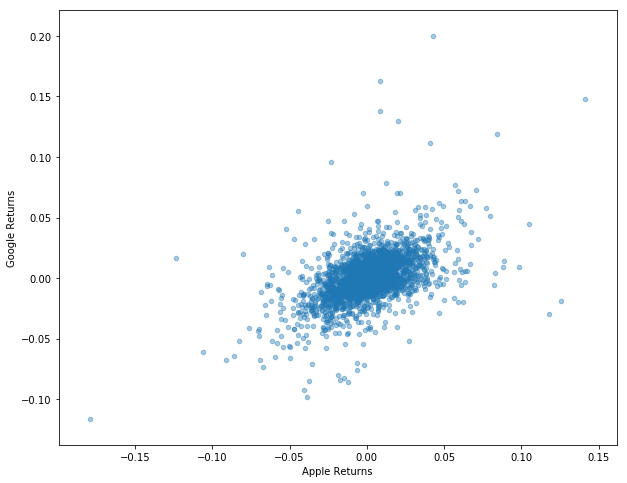

In [35]:
box_df.plot(kind='scatter',x='Apple Returns',y='Google Returns',alpha=0.4,figsize=(10,8));

### Part 7: Cumulative Daily Returns
With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

Create a cumulative daily return column for each car company's dataframe.

In [36]:
apple['Cumulative Return'] = (1 + apple['returns']).cumprod()

In [37]:
apple.head()

,Open,High,Low,Close,Volume,Name,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL,2.087160e+09,NaN,NaN
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL,1.665571e+09,0.002809,1.002809
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL,1.201514e+09,-0.007470,0.995318
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL,1.893498e+09,0.025400,1.020599
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL,1.850719e+09,-0.003670,1.016854


In [38]:
amazon['Cumulative Return'] = (1 + amazon['returns']).cumprod()
amazon.head()

,Open,High,Low,Close,Volume,Name,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,3.599236e+08,NaN,NaN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,3.532946e+08,-0.006936,0.993064
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2.554779e+08,0.008466,1.001471
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2.952211e+08,0.004617,1.006095
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,4.163924e+08,-0.016503,0.989491


In [39]:
google['Cumulative Return'] = (1 + google['returns']).cumprod()
google.head()

,Open,High,Low,Close,Volume,Name,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,2.778177e+09,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,3.397502e+09,0.023000,1.023000
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2.414272e+09,0.013507,1.036818
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,4.060892e+09,0.031924,1.069917
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,2.987060e+09,0.002660,1.072763


#### Lets plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a dollar invested? Which showed the lowest?

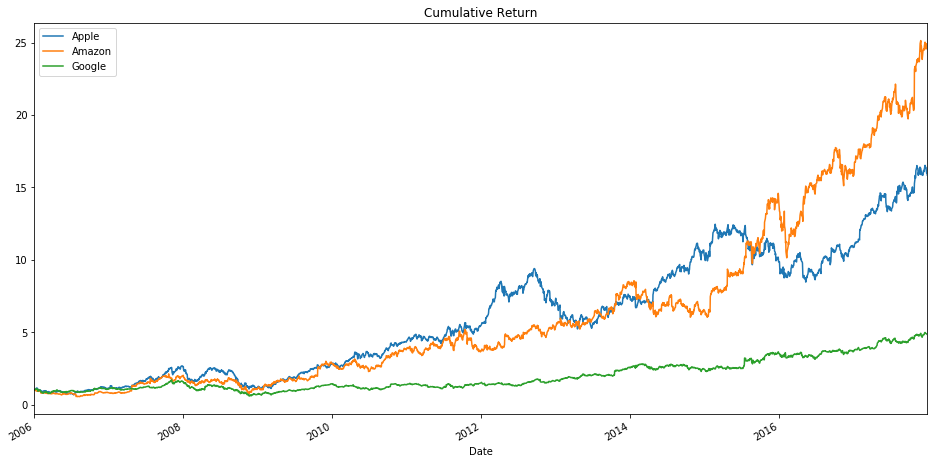

In [40]:
apple['Cumulative Return'].plot(label='Apple',figsize=(16,8),title='Cumulative Return')
amazon['Cumulative Return'].plot(label='Amazon')
google['Cumulative Return'].plot(label='Google')
plt.legend();

Increaseing Cumulative Return for Amazon increased a lot compared to Apple and Google

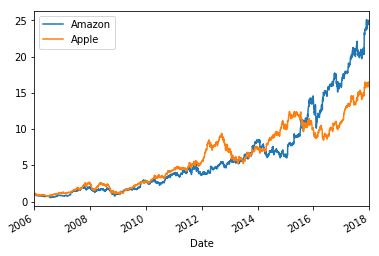

In [41]:
amazon['Cumulative Return'].plot(label='Amazon')
apple['Cumulative Return'].plot(label='Apple')
plt.legend();

#### Use these kernel for your analysis. Continue working on where I left off. Make sure to leave a suggestion and upvote. Thank you